In [1]:
from __future__ import division
import fipy
from scipy.special import erf

In [2]:
nx = 50
dx = 1.
mesh = fipy.Grid1D(nx=nx, dx=dx)

In [3]:
# NB: the initial value HAS to be a float, or disaster.
phi = fipy.CellVariable(name='solution', mesh=mesh, value=0.)

In [4]:
D = 1.

In [5]:
value_left = 1.
value_right = 0.

In [6]:
phi.constrain(value_right, mesh.facesRight)
phi.constrain(value_left, mesh.facesLeft)

In [7]:
eqX = fipy.TransientTerm() == fipy.ExplicitDiffusionTerm(coeff=D)

In [8]:
eqX

(TransientTerm(coeff=1.0) + ExplicitDiffusionTerm(coeff=[-1.0]))

In [9]:
timeStepDuration = 0.9 * dx**2 / (2 * D)
steps = 100

In [10]:
phi_analytical = fipy.CellVariable(name='analytical', mesh=mesh)

In [11]:
x = mesh.cellCenters[0]
t = timeStepDuration * steps

In [12]:
x.value

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5])

In [13]:
phi_analytical.setValue(1 - erf(x / (2 * np.sqrt(D * t))))

In [14]:
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

In [16]:
print(phi.allclose(phi_analytical, atol=7e-4))

True


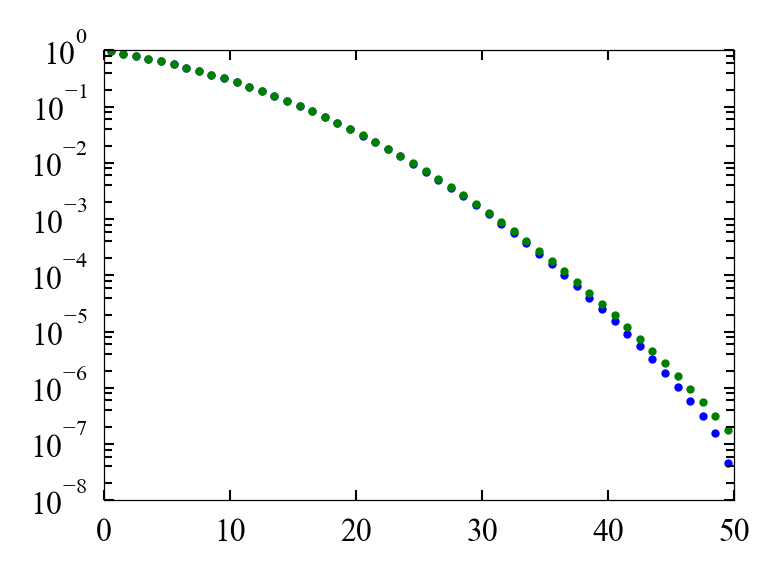

In [26]:
fig, ax = plt.subplots()
ax.set_yscale('log')

ax.plot(x.value, phi.value, '.')
ax.plot(x.value, phi_analytical.value, '.')